In [ ]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [2]:
import tensorflow as tf
import os
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Files/training_set_rel3(12k).tsv', sep='\t', encoding='ISO-8859-1')
df = df.drop(columns=['rater3_domain1', 'rater1_domain2', 'rater2_domain2',
                       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
                        'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
                       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
                       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
                        'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'rater1_domain1', 'rater2_domain1'])
df_1 = df[0:1783]
df_2 = df[1784:3583]
df_3 = df[3584:5309]
df_4 = df[5309:7079]
df_5 = df[7080:8884]
df_6 = df[8885:10684]
df_7 = df[10685:12253]
df_8 = df[12253:12977]
#df_1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Files/Dataset Prompt_1-8/Dataset of prompt_1.xlsx')
#df_2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Files/Dataset Prompt_1-8/Dataset of prompt_2.xlsx')
#df_3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Files/Dataset Prompt_1-8/Dataset of prompt_3.xlsx')
#df_4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Files/Dataset Prompt_1-8/Dataset of prompt_4.xlsx')
#df_5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Files/Dataset Prompt_1-8/dataset of prompt_5.xlsx')
#df_6 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Files/Dataset Prompt_1-8/Dataset of prompt_6.xlsx')
#df_7 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Files/Dataset Prompt_1-8/Dataset of prompt_8.xlsx')
#df_8 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Files/Dataset Prompt_1-8/dataset of prompt_5.xlsx')


In [ ]:
# Testing: Normalize and combine 3 columns in one
column = 'domain1_score'

df_1['final_score'] = ((df_1[column] - df_1[column].min()) / (df_1[column].max() - df_1[column].min()))*10
df_2['final_score'] = ((df_2[column] - df_2[column].min()) / (df_2[column].max() - df_2[column].min()))*10
df_3['final_score'] = ((df_3[column] - df_3[column].min()) / (df_3[column].max() - df_3[column].min()))*10
df_4['final_score'] = ((df_4[column] - df_4[column].min()) / (df_4[column].max() - df_4[column].min()))*10
df_5['final_score'] = ((df_5[column] - df_5[column].min()) / (df_5[column].max() - df_5[column].min()))*10
df_6['final_score'] = ((df_6[column] - df_6[column].min()) / (df_6[column].max() - df_6[column].min()))*10
df_7['final_score'] = ((df_7[column] - df_7[column].min()) / (df_7[column].max() - df_7[column].min()))*10
df_8['final_score'] = ((df_8[column] - df_8[column].min()) / (df_8[column].max() - df_8[column].min()))*10

df_1['final_score'] = df_1['final_score'].round(1).astype(int)
df_2['final_score'] = df_2['final_score'].round(1).astype(int)
df_3['final_score'] = df_3['final_score'].round(1).astype(int)
df_4['final_score'] = df_4['final_score'].round(1).astype(int)
df_5['final_score'] = df_5['final_score'].round(1).astype(int)
df_6['final_score'] = df_6['final_score'].round(1).astype(int)
df_7['final_score'] = df_7['final_score'].round(1).astype(int)
df_8['final_score'] = df_8['final_score'].round(1).astype(int)

In [ ]:
result = df_1.append([df_2, df_3, df_4, df_5, df_6, df_7, df_8], ignore_index=True)

In [ ]:
result

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6
...,...,...,...,...,...
12966,21626,8,In most stories mothers and daughters are eit...,35,5
12967,21628,8,I never understood the meaning laughter is th...,32,4
12968,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,6
12969,21630,8,Trippin' on fen...,40,6


In [ ]:
df = result

In [ ]:
column = 'domain1_score'
df['final_score'] = ((df[column] - df[column].min()) / (df[column].max() - df[column].min()))*10

df['final_score'] = df['final_score'].round(1).astype('int')

In [ ]:
df

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6
...,...,...,...,...,...
12966,21626,8,In most stories mothers and daughters are eit...,35,5
12967,21628,8,I never understood the meaning laughter is th...,32,4
12968,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,6
12969,21630,8,Trippin' on fen...,40,6


In [ ]:
## remove blank rows if any
df['essay'].dropna(inplace=True)

In [ ]:
## change all text to lowercase
df['essay'] = [i.lower() for i in df['essay']]

In [ ]:
## Tokenization
df['essay']= [word_tokenize(i) for i in df['essay']]

In [ ]:
## POS tagging
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [ ]:
df

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"[dear, local, newspaper, ,, i, think, effects,...",8,6
1,2,1,"[dear, @, caps1, @, caps2, ,, i, believe, that...",9,7
2,3,1,"[dear, ,, @, caps1, @, caps2, @, caps3, more, ...",7,5
3,4,1,"[dear, local, newspaper, ,, @, caps1, i, have,...",10,8
4,5,1,"[dear, @, location1, ,, i, know, having, compu...",8,6
...,...,...,...,...,...
12966,21626,8,"[in, most, stories, mothers, and, daughters, a...",35,5
12967,21628,8,"[i, never, understood, the, meaning, laughter,...",32,4
12968,21629,8,"[when, you, laugh, ,, is, @, caps5, out, of, h...",40,6
12969,21630,8,"[trippin, ', on, fences, i, am, @, num1, years...",40,6


In [ ]:
import time
start = time.time()

for index,entry in enumerate(df['essay']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df.loc[index,'text_final'] = str(Final_words)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 593.709178686142


In [ ]:
df

,essay_id,essay_set,essay,domain1_score,final_score,text_final
0,1,1,"[dear, local, newspaper, ,, i, think, effects,...",8,6,"['dear', 'local', 'newspaper', 'think', 'effec..."
1,2,1,"[dear, @, caps1, @, caps2, ,, i, believe, that...",9,7,"['dear', 'believe', 'use', 'computer', 'benefi..."
2,3,1,"[dear, ,, @, caps1, @, caps2, @, caps3, more, ...",7,5,"['dear', 'people', 'use', 'computer', 'everyon..."
3,4,1,"[dear, local, newspaper, ,, @, caps1, i, have,...",10,8,"['dear', 'local', 'newspaper', 'find', 'many',..."
4,5,1,"[dear, @, location1, ,, i, know, having, compu...",8,6,"['dear', 'know', 'computer', 'positive', 'effe..."
...,...,...,...,...,...,...
12966,21626,8,"[in, most, stories, mothers, and, daughters, a...",35,5,"['story', 'mother', 'daughter', 'either', 'ene..."
12967,21628,8,"[i, never, understood, the, meaning, laughter,...",32,4,"['never', 'understand', 'meaning', 'laughter',..."
12968,21629,8,"[when, you, laugh, ,, is, @, caps5, out, of, h...",40,6,"['laugh', 'habit', 'cause', 'cause', 'laugh', ..."
12969,21630,8,"[trippin, ', on, fences, i, am, @, num1, years...",40,6,"['trippin', 'fence', 'year', 'young', 'short',..."


In [ ]:
## Splitting the dataset
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text_final'],
                                                                    df['final_score'],test_size=0.3)

In [ ]:
## Word Vectorization by TF-IDF (Term Frequency — Inverse Document) 
Tfidf_vect = TfidfVectorizer(max_features=10000)
Tfidf_vect.fit(df['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
## print the vocabullary
print(Tfidf_vect.vocabulary_)

{'dear': 2222, 'local': 5261, 'newspaper': 5897, 'think': 8899, 'effect': 2838, 'computer': 1760, 'people': 6458, 'great': 3955, 'learning': 5101, 'give': 3830, 'time': 8991, 'chat': 1449, 'help': 4201, 'learn': 5097, 'globe': 3846, 'keep': 4936, 'troble': 9152, 'thing': 8898, 'dont': 2666, 'would': 9909, 'feel': 3407, 'teenager': 8776, 'always': 336, 'phone': 6534, 'friend': 3668, 'ever': 3081, 'buisness': 1175, 'partner': 6370, 'well': 9715, 'new': 5888, 'way': 9670, 'plenty': 6628, 'site': 8006, 'internet': 4771, 'facebook': 3298, 'myspace': 5776, 'ect': 2822, 'set': 7819, 'meet': 5501, 'bos': 1055, 'fun': 3711, 'rush': 7565, 'get': 3807, 'cause': 1357, 'want': 9622, 'use': 9424, 'outside': 6240, 'go': 3855, 'might': 5572, 'child': 1492, 'spend': 8275, 'lot': 5299, 'ask': 562, 'question': 7010, 'economy': 2819, 'sea': 7713, 'floor': 3524, 'spreading': 8313, 'even': 3075, 'surprise': 8607, 'much': 5740, 'know': 4989, 'believe': 856, 'interesting': 4760, 'class': 1560, 'day': 2210, 'r

In [ ]:
## training, testing and printing accuracy with MultinomialNB()

Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)
## print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

print("# MSE: ", mean_squared_error(Test_Y, predictions_NB))
print("# RMSE:", sqrt(mean_squared_error(Test_Y, predictions_NB)))

pred_RandForest = np.around(predictions_NB)
result = cohen_kappa_score(Test_Y, predictions_NB, weights='quadratic')
print("Kappa Score: {}".format(result))

# MSE:  5.634378211716341
# RMSE: 2.373684522365249
Kappa Score: 0.14757548462781422


In [ ]:
from sklearn.metrics import confusion_matrix

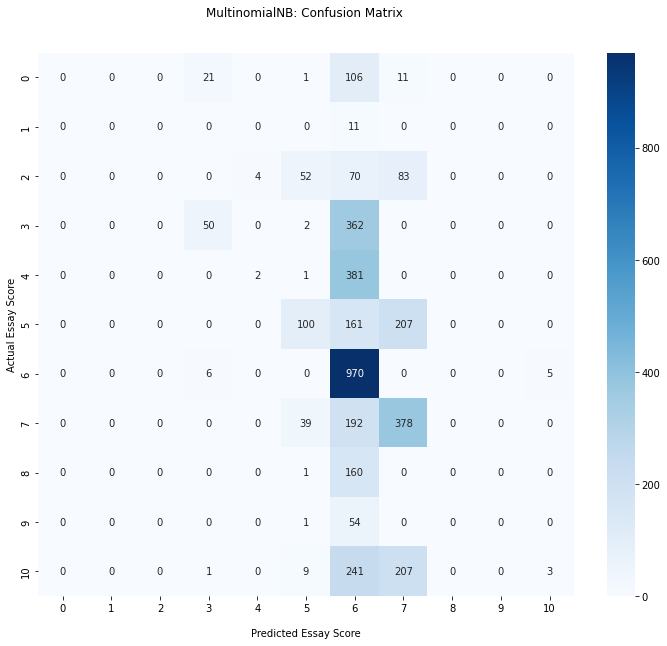

In [ ]:
NB_cm = confusion_matrix(Test_Y, predictions_NB)
plt.figure(figsize=(12,10))
ax = sns.heatmap(NB_cm, annot=True, cmap='Blues',fmt='.3g')

ax.set_title('MultinomialNB: Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Essay Score')
ax.set_ylabel('Actual Essay Score');

In [ ]:
## graph PLOT of MultinomialNB()
#plt.figure(figsize=(10,10))
#plt.scatter(Test_Y, predictions_NB, c='crimson')
#plt.yscale('linear')
#plt.xscale('linear')

#p1 = max(max(predictions_NB), max(Test_Y))
#p2 = min(min(predictions_NB), min(Test_Y))
#plt.plot([p1, p2], [p1, p2], 'b-')
#plt.xlabel('True Values', fontsize=15)
#plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
#plt.show()
clsf_report = pd.DataFrame(metrics.classification_report(y_true = Test_Y, y_pred = predictions_NB, output_dict=True)).transpose()
clsf_report.to_csv('MultiNB.csv', index= True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## training, testing and printing accuracy with SVM

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
## print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

print("# MSE: ", mean_squared_error(Test_Y, predictions_SVM))
print("# RMSE:", sqrt(mean_squared_error(Test_Y, predictions_SVM)))

pred_RandForest = np.around(predictions_SVM)
result = cohen_kappa_score(Test_Y, predictions_SVM, weights='quadratic')
print("Kappa Score: {}".format(result))

# MSE:  3.814491264131552
# RMSE: 1.9530722629056898
Kappa Score: 0.5694870608434197


In [ ]:
## Classification Report for SVM Classifier
clsf_report = pd.DataFrame(metrics.classification_report(y_true = Test_Y, y_pred = predictions_SVM, output_dict=True)).transpose()
clsf_report.to_csv('SVM.csv', index= True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


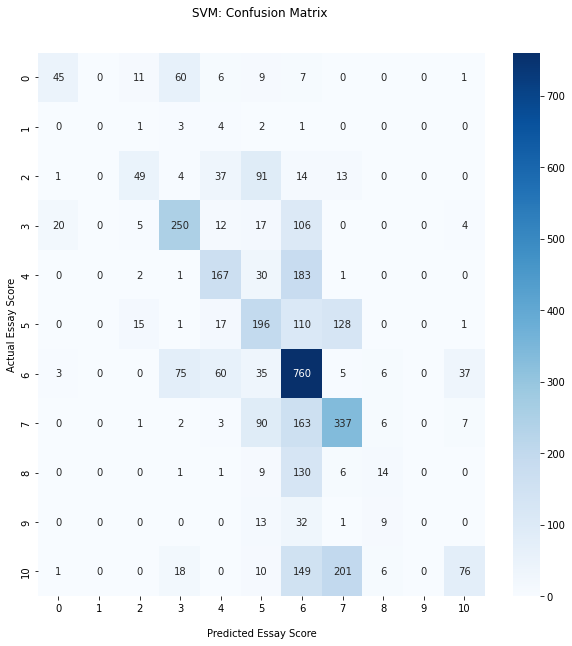

In [ ]:
## graph PLOT of SVM
SVM_cm = confusion_matrix(Test_Y, predictions_SVM)
plt.figure(figsize=(10,10))
ax = sns.heatmap(SVM_cm, annot=True, cmap='Blues',fmt='.3g')
ax.set_title('SVM: Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Essay Score')
ax.set_ylabel('Actual Essay Score');

In [ ]:
## training, testing and printing accuracy with LinearSVC
#with strategy.scope():
LinearSVC = LinearSVC()
LinearSVC.fit(Train_X_Tfidf,Train_Y)
pred_LinearSVC = LinearSVC.predict(Test_X_Tfidf)
## print("SVM Accuracy Score -> ",accuracy_score(pred_LinearSVC, Test_Y)*100)

print("# MSE: ", mean_squared_error(Test_Y, pred_LinearSVC))
print("# RMSE:", sqrt(mean_squared_error(Test_Y, pred_LinearSVC)))

pred_LinearSVC = np.around(pred_LinearSVC)
result = cohen_kappa_score(Test_Y, pred_LinearSVC, weights='quadratic')
print("Kappa Score: {}".format(result))

# MSE:  4.529033915724563
# RMSE: 2.1281527002836436
Kappa Score: 0.5617735060871865


In [ ]:
## Classification Report for pred_LinearSVC Classifier
clsf_report = pd.DataFrame(metrics.classification_report(y_true = Test_Y, y_pred = pred_LinearSVC, output_dict=True)).transpose()
clsf_report.to_csv('Linear SVC.csv', index= True)

              precision    recall  f1-score   support

           0       0.51      0.37      0.43       139
           1       0.00      0.00      0.00        11
           2       0.39      0.25      0.31       209
           3       0.53      0.55      0.54       414
           4       0.46      0.41      0.44       384
           5       0.32      0.33      0.32       468
           6       0.48      0.61      0.54       981
           7       0.42      0.48      0.45       609
           8       0.26      0.20      0.23       161
           9       0.15      0.04      0.06        55
          10       0.48      0.32      0.38       461

    accuracy                           0.44      3892
   macro avg       0.36      0.32      0.34      3892
weighted avg       0.44      0.44      0.43      3892



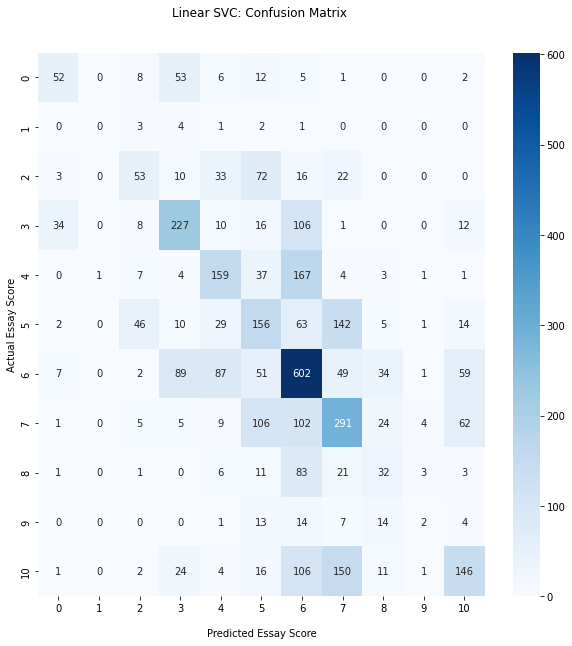

In [ ]:
## graph PLOT of LinearSVC
LinerSVC_cm = confusion_matrix(Test_Y, pred_LinearSVC)
plt.figure(figsize=(10,10))
ax = sns.heatmap(LinerSVC_cm, annot=True, cmap='Blues',fmt='.3g')
ax.set_title('Linear SVC: Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Essay Score')
ax.set_ylabel('Actual Essay Score');

In [ ]:
## training, testing and printing accuracy with KNeighborsClassifier

#with strategy.scope():
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(Train_X_Tfidf,Train_Y)
pred_KNeighbors = KNeighborsClassifier.predict(Test_X_Tfidf)
## print("SVM Accuracy Score -> ",accuracy_score(pred_KNeighbors, Test_Y)*100)

print("# MSE: ", mean_squared_error(Test_Y, pred_KNeighbors))
print("# RMSE:", sqrt(mean_squared_error(Test_Y, pred_KNeighbors)))

pred_KNeighbors = np.around(pred_KNeighbors)
result = cohen_kappa_score(Test_Y, pred_KNeighbors, weights='quadratic')
print("Kappa Score: {}".format(result))

# MSE:  6.125385405960945
# RMSE: 2.4749515966905182
Kappa Score: 0.4370638152628906


In [ ]:
## Classification Report for KNeighborsClassifier
print(metrics.classification_report(Test_Y, pred_KNeighbors))
clsf_report = pd.DataFrame(metrics.classification_report(y_true = Test_Y, y_pred = pred_KNeighbors, output_dict=True)).transpose()
clsf_report.to_csv('pred_KNeighbors.csv', index= True)

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       139
           1       0.00      0.00      0.00        11
           2       0.31      0.24      0.27       209
           3       0.40      0.53      0.46       414
           4       0.37      0.42      0.39       384
           5       0.32      0.38      0.35       468
           6       0.43      0.49      0.46       981
           7       0.41      0.38      0.39       609
           8       0.27      0.10      0.15       161
           9       0.09      0.04      0.05        55
          10       0.41      0.25      0.31       461

    accuracy                           0.39      3892
   macro avg       0.31      0.29      0.29      3892
weighted avg       0.38      0.39      0.38      3892



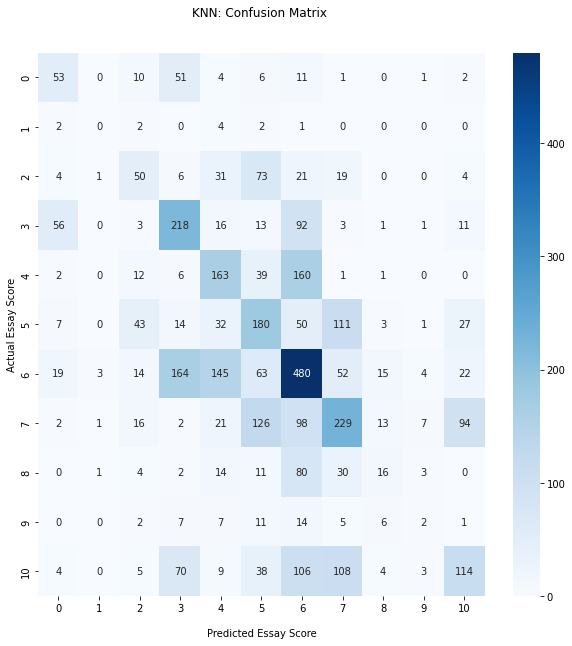

In [ ]:
## graph PLOT of KNeighborsClassifier
KNeighbors_cm = confusion_matrix(Test_Y, pred_KNeighbors)
plt.figure(figsize=(10,10))
ax = sns.heatmap(KNeighbors_cm, annot=True, cmap='Blues',fmt='.3g')
ax.set_title('KNN: Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Essay Score')
ax.set_ylabel('Actual Essay Score');

In [ ]:
## training, testing and printing accuracy with LinearRegression()
#with strategy.scope():
regr = linear_model.LinearRegression()
regr.fit(Train_X_Tfidf,Train_Y)
pred_regr = regr.predict(Test_X_Tfidf)

print("# MSE: ", mean_squared_error(Test_Y, pred_regr))
print("# RMSE:", sqrt(mean_squared_error(Test_Y, pred_regr)))

pred_regr = np.around(pred_regr)
result = cohen_kappa_score(Test_Y, pred_regr, weights='quadratic')
print("Kappa Score: {}".format(result))

# MSE:  5790.303868551024
# RMSE: 76.094046209615
Kappa Score: 0.001918987122526028


In [ ]:
## Classification Report for LinearRegression()
print(metrics.classification_report(Test_Y, pred_regr))
clsf_report = pd.DataFrame(metrics.classification_report(y_true = Test_Y, y_pred = pred_regr, output_dict=True)).transpose()
clsf_report.to_csv('LinearRegression.csv', index= True)

              precision    recall  f1-score   support

      -844.0       0.00      0.00      0.00         0
      -668.0       0.00      0.00      0.00         0
      -514.0       0.00      0.00      0.00         0
      -421.0       0.00      0.00      0.00         0
      -366.0       0.00      0.00      0.00         0
      -361.0       0.00      0.00      0.00         0
      -357.0       0.00      0.00      0.00         0
      -350.0       0.00      0.00      0.00         0
      -333.0       0.00      0.00      0.00         0
      -326.0       0.00      0.00      0.00         0
      -323.0       0.00      0.00      0.00         0
      -317.0       0.00      0.00      0.00         0
      -311.0       0.00      0.00      0.00         0
      -296.0       0.00      0.00      0.00         0
      -293.0       0.00      0.00      0.00         0
      -278.0       0.00      0.00      0.00         0
      -277.0       0.00      0.00      0.00         0
      -275.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

In [ ]:
## graph PLOT of LinearRegression()
#g=plt.plot(Test_Y - pred_regr,marker='o',linestyle='')
#plt.figure(figsize=(5,5))
##plt.plot(Test_Y,pred_regr , c='crimson', marker='o',linestyle='')
##plt.ylim(0)
##plt.xlim()
##plt.yscale('linear')
##plt.xscale('linear')
##plt.xlabel('True Values', fontsize=15)
##plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
#plt.axis('square')
##plt.show()

## graph PLOT of LinearRegression()
LinearReg_cm = confusion_matrix(Test_Y, pred_regr)
#print(LinearReg_cm)
plt.figure(figsize=(10,10))
ax = sns.heatmap(LinearReg_cm, annot=True, cmap='Blues',fmt='.3g')
ax.set_title('LinearRegression(): Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Essay Score')
ax.set_ylabel('Actual Essay Score');

In [ ]:
## training, testing and printing accuracy with LogisticRegression()
#with strategy.scope():
logRegr = linear_model.LogisticRegression()
logRegr.fit(Train_X_Tfidf,Train_Y)
pred_logRegr = logRegr.predict(Test_X_Tfidf)

print("# MSE: ", mean_squared_error(Test_Y, pred_logRegr))
print("# RMSE:", sqrt(mean_squared_error(Test_Y, pred_logRegr)))

pred_logRegr = np.around(pred_logRegr)
result = cohen_kappa_score(Test_Y, pred_logRegr, weights='quadratic')
print("Kappa Score: {}".format(result))

# MSE:  4.227903391572457
# RMSE: 2.056186613995057
Kappa Score: 0.5242306728605244


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
## Classification Report for LogisticRegression()
print(metrics.classification_report(Test_Y, pred_logRegr))
clsf_report = pd.DataFrame(metrics.classification_report(y_true = Test_Y, y_pred = pred_logRegr, output_dict=True)).transpose()
clsf_report.to_csv('pred_logRegr.csv', index= True)

              precision    recall  f1-score   support

           0       0.61      0.22      0.32       139
           1       0.00      0.00      0.00        11
           2       0.54      0.18      0.27       209
           3       0.58      0.59      0.58       414
           4       0.55      0.40      0.46       384
           5       0.34      0.40      0.37       468
           6       0.46      0.74      0.56       981
           7       0.46      0.54      0.50       609
           8       0.33      0.10      0.15       161
           9       0.00      0.00      0.00        55
          10       0.53      0.20      0.29       461

    accuracy                           0.47      3892
   macro avg       0.40      0.31      0.32      3892
weighted avg       0.47      0.47      0.44      3892



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

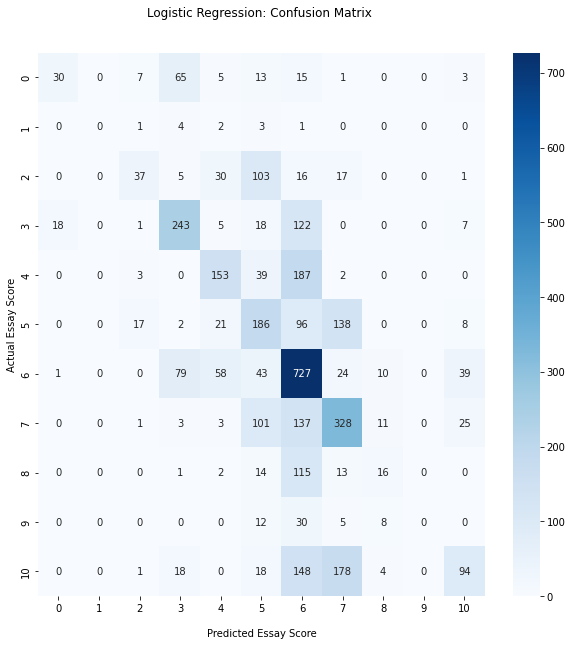

In [ ]:
## graph PLOT of LogisticRegression()
logRegr_cm = confusion_matrix(Test_Y, pred_logRegr)
plt.figure(figsize=(10,10))
ax = sns.heatmap(logRegr_cm, annot=True, cmap='Blues',fmt='.3g')
ax.set_title('Logistic Regression: Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Essay Score')
ax.set_ylabel('Actual Essay Score');

In [ ]:
## training, testing and printing accuracy with RandomForestClassifier()
#with strategy.scope():
RandForest = RandomForestClassifier()
RandForest.fit(Train_X_Tfidf,Train_Y)
pred_RandForest = RandForest.predict(Test_X_Tfidf)

print("# MSE: ", mean_squared_error(Test_Y, pred_RandForest))
print("# RMSE:", sqrt(mean_squared_error(Test_Y, pred_RandForest)))

pred_RandForest = np.around(pred_RandForest)
result = cohen_kappa_score(Test_Y, pred_RandForest, weights='quadratic')
print("Kappa Score: {}".format(result))

# MSE:  3.5719424460431655
# RMSE: 1.8899583185994249
Kappa Score: 0.5814935095221536


In [ ]:
## Classification Report for RandomForestClassifier()
print(metrics.classification_report(Test_Y, pred_RandForest))
clsf_report = pd.DataFrame(metrics.classification_report(y_true = Test_Y, y_pred = pred_RandForest, output_dict=True)).transpose()
clsf_report.to_csv('pred_RandForest.csv', index= True)

              precision    recall  f1-score   support

           0       0.59      0.29      0.39       139
           1       0.00      0.00      0.00        11
           2       0.64      0.26      0.37       209
           3       0.60      0.69      0.64       414
           4       0.62      0.35      0.45       384
           5       0.51      0.46      0.49       468
           6       0.43      0.85      0.57       981
           7       0.55      0.56      0.56       609
           8       0.50      0.02      0.04       161
           9       0.00      0.00      0.00        55
          10       0.85      0.13      0.22       461

    accuracy                           0.51      3892
   macro avg       0.48      0.33      0.34      3892
weighted avg       0.56      0.51      0.46      3892



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

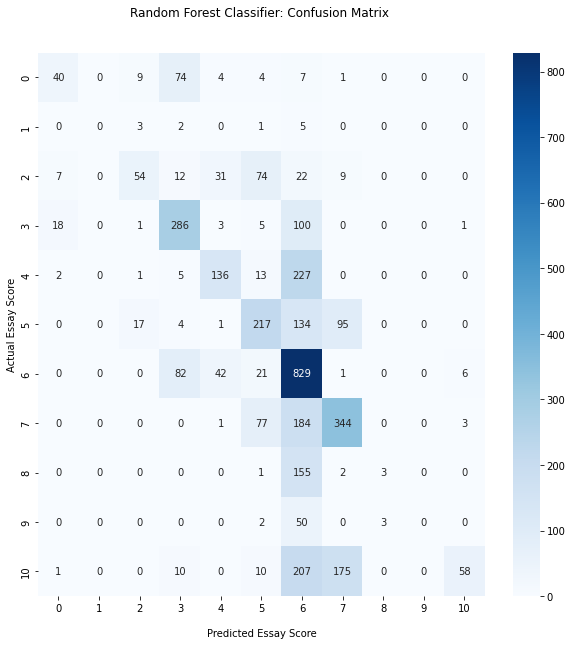

In [ ]:
## graph PLOT of RandomForestClassifier()
RandForest_cm = confusion_matrix(Test_Y, pred_RandForest)
plt.figure(figsize=(10,10))
ax = sns.heatmap(RandForest_cm, annot=True, cmap='Blues',fmt='.3g')
ax.set_title('Random Forest Classifier: Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Essay Score')
ax.set_ylabel('Actual Essay Score');

In [ ]:
## training, testing and printing accuracy with XGBClassifier()
#with strategy.scope():
xgbc = XGBClassifier()
xgbc.fit(Train_X_Tfidf,Train_Y)
pred_xgbc = xgbc.predict(Test_X_Tfidf)

print("# MSE: ", mean_squared_error(Test_Y, pred_xgbc))
print("# RMSE:", sqrt(mean_squared_error(Test_Y, pred_xgbc)))

pred_xgbc = np.around(pred_xgbc)
result = cohen_kappa_score(Test_Y, pred_xgbc, weights='quadratic')
print("Kappa Score: {}".format(result))

# MSE:  3.7335560123329907
# RMSE: 1.9322411889650295
Kappa Score: 0.6013127300617


In [ ]:
## Classification Report for XGBClassifier()
print(metrics.classification_report(Test_Y, pred_xgbc))
clsf_report = pd.DataFrame(metrics.classification_report(y_true = Test_Y, y_pred = pred_xgbc, output_dict=True)).transpose()
clsf_report.to_csv('pred_xgbc.csv', index= True)

              precision    recall  f1-score   support

           0       0.57      0.24      0.34       139
           1       0.33      0.09      0.14        11
           2       0.66      0.17      0.27       209
           3       0.57      0.64      0.60       414
           4       0.59      0.41      0.48       384
           5       0.53      0.44      0.48       468
           6       0.44      0.79      0.56       981
           7       0.58      0.51      0.54       609
           8       0.42      0.21      0.28       161
           9       0.13      0.04      0.06        55
          10       0.68      0.37      0.48       461

    accuracy                           0.51      3892
   macro avg       0.50      0.35      0.39      3892
weighted avg       0.54      0.51      0.49      3892



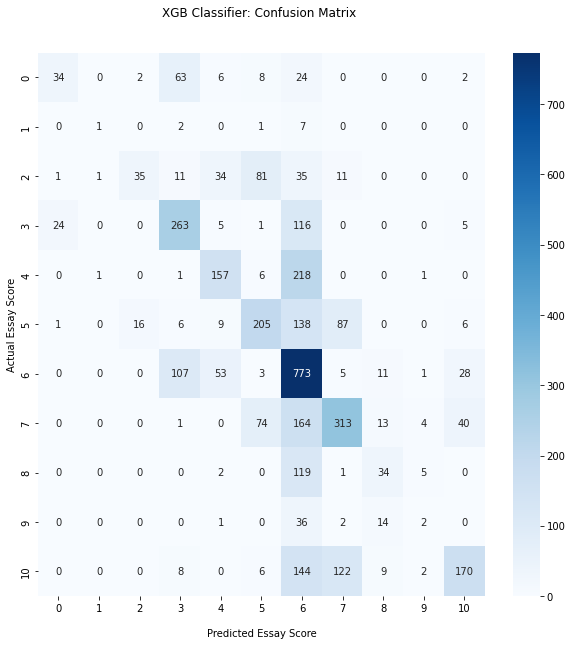

In [ ]:
## graph PLOT of XGBClassifier()
xgbc_cm = confusion_matrix(Test_Y, pred_xgbc)
plt.figure(figsize=(10,10))
ax = sns.heatmap(xgbc_cm, annot=True, cmap='Blues',fmt='.3g')
ax.set_title('XGB Classifier: Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Essay Score')
ax.set_ylabel('Actual Essay Score');

In [ ]:
#with strategy.scope():
scores = cross_val_score(xgbc, Train_X_Tfidf, Train_Y, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.50


In [ ]:
#with strategy.scope():
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, Train_X_Tfidf, Train_Y, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.50
